# Linear Regression with Python's Sklearn and the Backend Working of that Algorithm
    In Linear Regression we make prediction prediction on dependent variable by Drawing a best Fit Line


By : Param Kesarwani

In [5]:
import numpy as np
import pandas as pd

df=  pd.read_csv('./Student_score.csv')  # Reading The Csv file using pandas library
df.head()  # print the top 5 records  

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [43]:
df.shape  # TO get the shape of dataframe

(25, 2)

In [169]:
df.isna().sum()  
# To check whether null values are present or Not.isna() method returns a boolean array with 1 for Nan values and 0 for values. 
#Applyig Sum on that boolean array gives the count of null values in each columns.

Hours     0
Scores    0
dtype: int64

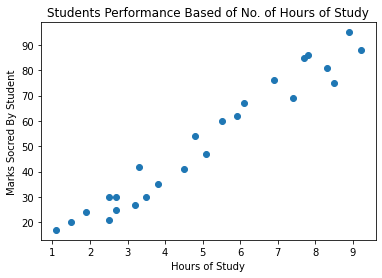

In [149]:
import matplotlib.pyplot as plt
plt.xlabel("Hours of Study")
plt.ylabel("Marks Socred By Student")
plt.title("Students Performance Based of No. of Hours of Study")
plt.scatter(x='Hours',y='Scores',data=df)  # Draw a scatter plot to show the relation of Hours and Score column
plt.show()

The Scatterplot shows a positive Correlation between both the variables , hence a straight line can easily make prediction with least error

In [171]:
df.corr()  # To calculate the correlation btwn the score and Hours . As scatterplot stated , corr values is close to 1

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [172]:
a =20
#Splitting the data for testing and training purpose . X_train will be used for trainng and X_test for model performance Evaluation
X_train,X_test,y_train,y_test = df.loc[:a]['Hours'],df.loc[a:]['Hours'],df.loc[:a]['Scores'],df.loc[a:]['Scores']
print(X_train,X_test)

0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
Name: Hours, dtype: float64 20    2.7
21    4.8
22    3.8
23    6.9
24    7.8
Name: Hours, dtype: float64


### We will first Implement the Linear Regreesion using Sklearn  Library , then A python code to understand the maths behind it and how sklearn computes these values in backend

In [173]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(pd.DataFrame(X_train),y_train)
reg.score(pd.DataFrame(X_test),y_test)

0.9275549602056954

In [174]:
y_pred = reg.predict(pd.DataFrame(X_test))
print(y_pred,"\n",y_test)


[28.8386008  48.79042651 39.28955712 68.74225222 77.29303467] 
 20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64


In [ ]:
Since We have only 2 variables then equaion can be expressed as simple Straight line y = mx + b

In [175]:
m = reg.coef_
b = reg.intercept_
print("The Model's slope is {} and intercept is {}".format(m,b))

The Model's slope is [9.50086939] and intercept is 3.186253451979155


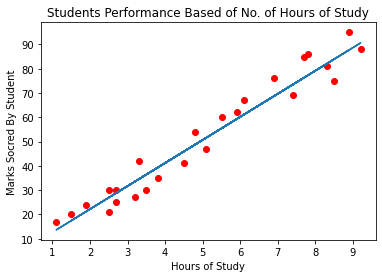

In [180]:
plt.xlabel("Hours of Study")
plt.ylabel("Marks Socred By Student")
plt.title("Students Performance Based of No. of Hours of Study")
plt.scatter(x='Hours',y='Scores',data=df,marker='o',color='red')  # Draw a scatter plot to show the relation of Hours and Score column
plt.plot(df['Hours'],m*df['Hours'] + b)
plt.show()

The Above plot show the distribution of points(red Dots) and the Regression line(The best line, in blue)

## Metrics to evaluate the LinearRegression Model

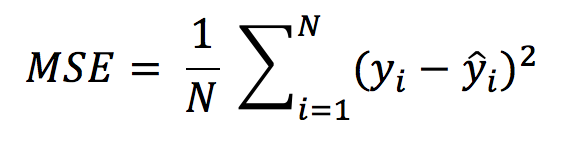

y(hat) is the predicted value and y(i) is the truth value 

In [181]:
### Mean Squared Error(MSE)
sum = [(x-y)**2 for x,y in zip(y_pred,y_test)]
print("Mean Squared Error:",np.mean(sum),"\n","Root Mean Squared Error:",np.sqrt(np.mean(sum)))

Mean Squared Error: 35.07499046681055 
 Root Mean Squared Error: 5.922414243094664


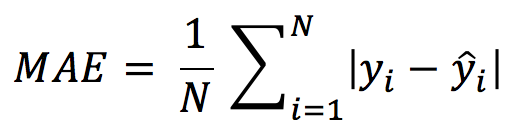

In [159]:
### Mean Absolute Error
sum = [np.abs(x-y) for x,y in zip(y_pred,y_test)]
print("Mean Absolute Error:",np.mean(sum))

Mean Absolute Error: 5.325048583410045


In [160]:
### Using Sklearn Library calculate the R2
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9275549602056954


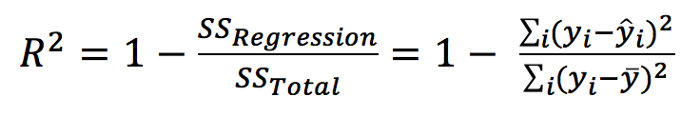

Formula to Calculate R2  => yi is the truth value and y(hat) is the predicted val, y(bar) is the mean of y_true

R Square measures how much variability in dependent variable can be explained by the model. It is the square of the Correlation Coefficient(R) and that is why it is called R Square. R Square closer to 1 means good predictive performance

In [161]:
# Function To Calculate R2 
def R2(y_pred,y_true):
    mean_of_trueval = np.mean(y_true)
    squared_error = [(x-y)**2 for x,y in zip(y_pred,y_true)]
    mean_error = [(x-mean_of_trueval)**2 for x in y_true]
    return 1-(np.sum(squared_error)/np.sum(mean_error))

R2(y_pred,y_test)



0.9275549602056954

Sklearn LinearRegression uses GradientDescent Algorith to calculate the best fit parameters(m,b in y = mx+b)

1.We first initialise the values of m ,b = 0

2.Then calulate the partial derivative of loss(Mean Squared Error, as its differentiable unlikely MAE) with resect to parameters


3.Using these derivatives we upate our parameters by taking baby steps(learning rate) towards Global Minima, though reducing our loss to best possible value



In [183]:
def BatchGradientDescent(X,y):
    m = b = 0 # Initial declared the parameters to 0
    epochs = 10000  # of times we make a baby steps
    n = len(X) # Length of data
    learning_rate =  0.001 # by with amount we will approach to global minima
    for i in range(epochs):
        y_predicted = m * X + b 
        derivate_of_slope = -(2/n)*np.sum(X*(y - y_predicted))
        derivate_of_intercept = -(2/n)*np.sum(y-y_predicted)
        b = b - learning_rate * derivate_of_intercept
        m = m - learning_rate * derivate_of_slope 
    return m,b

coef , intercept =  BatchGradientDescent(X_train,y_train)
        

In [184]:
print(" Models Slope {} , Our Slope using Gradient Descent {}".format(reg.coef_,coef))
print(" Models Intercept {} , Our Intercept using Gradient Descent {}".format(reg.intercept_,intercept))

 Models Slope [9.50086939] , Our Slope using Gradient Descent 9.50443998194662
 Models Intercept 3.186253451979155 , Our Intercept using Gradient Descent 3.164178824583435


In [185]:
print( coef * 9.25 + intercept)
# reg.predict([[9.25]])

91.08024865758966
